<a href="https://colab.research.google.com/github/Saranyanv/test/blob/master/Assignment7_Vasudevan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initial Setup**

In [0]:
# coding: utf-8

# Initial deep neural network set-up from 
# Géron, A. 2017. Hands-On Machine Learning with Scikit-Learn 
#    & TensorFlow: Concepts, Tools, and Techniques to Build 
#    Intelligent Systems. Sebastopol, Calif.: O'Reilly. 
#    [ISBN-13 978-1-491-96229-9] 
#    Source code available at https://github.com/ageron/handson-ml
#    See file 10_introduction_to_artificial_neural_networks.ipynb 
#    Revised from MNIST to Cats and Dogs to begin Assignment 7
#    #CatsDogs# comment lines show additions/revisions for Cats and Dogs

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports for our work
import os 
import numpy as np
import tensorflow as tf
import zipfile
from tqdm import tqdm
# Working with images
import cv2
import re

# Display Images
from PIL import Image, ImageFilter

# IPython display
from IPython.display import display

RANDOM_SEED = 42

In [0]:
RANDOM_SEED = 42

IMG_WIDTH = 50
IMG_HEIGHT = 50
IMG_CHANNELS = 1

In [0]:
# To make output stable across runs
def reset_graph(seed= RANDOM_SEED):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [0]:
#CatsDogs# Old dimensions from MNIST no loger apply
#CatsDogs# height = 28
#CatsDogs# width = 28
#height = 64
#width = 64  

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#from google.colab import files
#uploaded = files.upload()

In [0]:
!ls /content/drive/'My Drive'/MSPA/'Predict 422'/'Week 7'

cats_dogs_images.zip


In [0]:
def label_img(img_name):
  if 'cat.' in img_name: return 0
  elif 'dog.' in img_name: return 1

In [0]:
def img_index(img_name):
  if 'cat.' in img_name: knt=0
  elif 'dog.' in img_name: knt=1
  num=int(re.sub("\D", "", img_name))
  return ((1000*knt) + num)

def Diff(li1, li2): 
    return (list(set(li1) - set(li2))) 

In [14]:
print (img_index('cats_dogs_images/dog.2.jpg'))

1002


# Data Preparation

In [90]:
training_data = []

with zipfile.ZipFile("/content/drive/My Drive/MSPA/Predict 422/Week 7/cats_dogs_images.zip", 'r') as z:
#with zipfile.ZipFile("cats_dogs_images.zip", 'r') as z:
  for fn in tqdm(z.namelist()):
    if not os.path.isdir(fn) and fn.endswith("jpg"):

      label = label_img(fn)
      img_indx = img_index(fn)

      img_str = z.read(fn)

      nparr = np.frombuffer(img_str, np.uint8)

      img_np = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)

      img = cv2.resize(img_np, (IMG_WIDTH, IMG_HEIGHT))

      training_data.append([ np.array(img_indx), np.array(img), np.array(label)])
      #print (label)

100%|██████████| 2000/2000 [00:02<00:00, 815.74it/s]


In [0]:
from random import shuffle 
from random import *

shuffle(training_data)


indx=[]
for i in range(len(training_data)):
  indx0=int(training_data[i][0])
  indx.append(indx0)


ITR=[]
while True:
  for iteration in range(len(training_data) // 20):
      for x in range(70):
        nbr = randint(1,len(training_data))
        if nbr not in ITR:
          ITR.append(nbr)
      print (iteration, len(ITR))
      if len(ITR) == len(training_data):
        break
  if len(ITR) == len(training_data):
    break

#diff_list=Diff(indx, ITR)
#print (diff_list)

In [0]:
#  for iteration in range(len(diff_list) // 5):
#    for x in range(70):
#      nbr = randint(1,len(training_data))
#      if nbr not in ITR:
#        ITR.append(nbr)

In [0]:
#CatsDogs# 
# Documentation on npy binary format for saving numpy arrays for later use
#     https://towardsdatascience.com/
#             why-you-should-start-using-npy-file-more-often-df2a13cc0161
# Under the working directory, data files are in directory cats_dogs_64_128 
# Read in cats and dogs grayscale 64x64 files to create training data
#cats_1000_64_64_1 = np.load('cats_dogs_64-128/cats_1000_64_64_1.npy')
#dogs_1000_64_64_1 = np.load('cats_dogs_64-128/dogs_1000_64_64_1.npy')


from matplotlib import pyplot as plt  # for display of images
def show_grayscale_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
# Examine first cat and first dog grayscale images
#show_grayscale_image(cats_1000_64_64_1[0,:,:,0])
#show_grayscale_image(dogs_1000_64_64_1[0,:,:,0])

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="bicubic")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="bicubic")
    plt.axis("off")

    
from IPython.display import clear_output, Image, display, HTML
import datetime

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [0]:
def shuffle_batch(X1, y1, batch_size):
    rnd_idx = np.random.permutation(len(X1))
    n_batches = len(X1) // batch_size 
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X1[batch_idx], y1[batch_idx]
        yield X_batch, y_batch

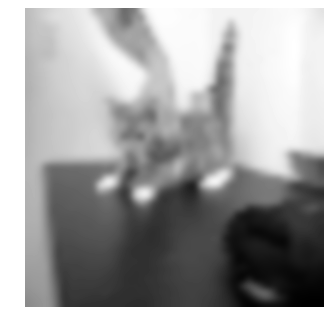

In [0]:
plot_image(training_data[0][0])

In [0]:
# 300 and 100 nodes for layers 1 and 2 as used with MNIST from Geron
n_hidden1 = 300
n_hidden2 = 100

In [0]:
channels = 1  # When working with color images use channels = 3

In [0]:
n_inputs = IMG_WIDTH * IMG_HEIGHT * IMG_CHANNELS
n_outputs = 2

In [0]:
#for i in range(2000):
#  for x,y in enumerate(training_data):
#    print (i, y[1])
#    i=i+1
#    if i > 2000:
#     break
#    break

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#tr_pd=pd.DataFrame(training_data)
#X_train, y_train, X_test, y_test = train_test_split(tr_pd[0], tr_pd[1], test_size=0.33, random_state=42)

#X_train = X_train.astype(np.float32).reshape(-1, IMG_WIDTH*IMG_HEIGHT)/255.0
#X_train = X_train.astype(np.float32).reshape(-1, IMG_WIDTH, IMG_HEIGHT, 1)
#X_test = X_test.astype(np.float32).reshape(-1, IMG_WIDTH*IMG_HEIGHT, 1)
#y_train = y_train.astype(np.int32)
#y_test = y_test.astype(np.int32)
#X_valid, X_train = X_train[:100], X_train[100:]
#y_valid, y_train = y_train[:100], y_train[100:]


train = training_data[:-600]
test = training_data[-600:]

X_train = np.array([i[0] for i in train]).astype(np.float32).reshape(-1, IMG_WIDTH, IMG_HEIGHT, 1)
y_train = np.array([i[1] for i in train]).astype(np.int32)

X_test = np.array([i[0] for i in test]).astype(np.float32).reshape(-1, IMG_WIDTH, IMG_HEIGHT, 1)
y_test = np.array([i[1] for i in test]).astype(np.int32)


#X_train = np.array([i[0] for i in train]).reshape(-1, IMG_WIDTH*IMG_HEIGHT)
#y_train = np.array([i[1] for i in train]).astype(np.int32)

#X_test = np.array([i[0] for i in test]).reshape(-1, IMG_WIDTH*IMG_HEIGHT)
#y_test = np.array([i[1] for i in test]).astype(np.int32)

In [0]:
conv1_fmaps = 10
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 20
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps
pool4_fmaps = conv2_fmaps
n_fc1 = 20
n_outputs = 2

#**MODEL 1**

In [0]:
reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, IMG_WIDTH, IMG_HEIGHT,1])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")

conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")
                         
with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 12 * 12])
    #pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 1 * 1])
    
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")
    
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")
    
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [0]:
n_epochs = 20
batch_size = 70

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        i=0
        for iteration in range(len(X_train) // batch_size):
            X_batch, y_batch = X_train[i:(i+70):1], y_train[i:(i+70):1]
            sess.run(training_op, feed_dict={X_reshaped: X_batch, y: y_batch})
            #print (epoch, iteration, i, i+70, len(X_batch))
            i=i+70
        acc_train = accuracy.eval(feed_dict={X_reshaped: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X_reshaped: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_trained_model1")

0 Train accuracy: 0.51428574 Test accuracy: 0.52
1 Train accuracy: 0.5285714 Test accuracy: 0.525
2 Train accuracy: 0.4857143 Test accuracy: 0.49833333
3 Train accuracy: 0.5714286 Test accuracy: 0.50666666
4 Train accuracy: 0.7 Test accuracy: 0.58
5 Train accuracy: 0.6857143 Test accuracy: 0.6066667
6 Train accuracy: 0.7 Test accuracy: 0.61
7 Train accuracy: 0.74285716 Test accuracy: 0.62166667
8 Train accuracy: 0.75714284 Test accuracy: 0.635
9 Train accuracy: 0.75714284 Test accuracy: 0.635
10 Train accuracy: 0.75714284 Test accuracy: 0.61833334
11 Train accuracy: 0.75714284 Test accuracy: 0.6016667
12 Train accuracy: 0.8142857 Test accuracy: 0.61833334
13 Train accuracy: 0.8428571 Test accuracy: 0.63666666
14 Train accuracy: 0.82857144 Test accuracy: 0.6
15 Train accuracy: 0.8428571 Test accuracy: 0.59833336
16 Train accuracy: 0.87142855 Test accuracy: 0.61
17 Train accuracy: 0.87142855 Test accuracy: 0.62666667
18 Train accuracy: 0.87142855 Test accuracy: 0.62333333
19 Train accura

In [0]:
'''n_epochs = 20
batch_size = 60

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(len(X_train) // batch_size):
            #X_batch, y_batch = shuffle_batch(X_train, y_train, batch_size)
            rnd_idx = np.random.permutation(len(X_train))
            n_batches = len(X_train) // batch_size 
            for batch_idx in np.array_split(rnd_idx, n_batches):
              X_batch, y_batch = X_train[batch_idx], y_train[batch_idx]
            #print (len(X_batch), len(y_batch))
            sess.run(training_op, feed_dict={X_reshaped: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X_reshaped: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X_reshaped: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_trained_model1")'''

'n_epochs = 20\nbatch_size = 60\n\nwith tf.Session() as sess:\n    init.run()\n    for epoch in range(n_epochs):\n        for iteration in range(len(X_train) // batch_size):\n            #X_batch, y_batch = shuffle_batch(X_train, y_train, batch_size)\n            rnd_idx = np.random.permutation(len(X_train))\n            n_batches = len(X_train) // batch_size \n            for batch_idx in np.array_split(rnd_idx, n_batches):\n              X_batch, y_batch = X_train[batch_idx], y_train[batch_idx]\n            #print (len(X_batch), len(y_batch))\n            sess.run(training_op, feed_dict={X_reshaped: X_batch, y: y_batch})\n        acc_train = accuracy.eval(feed_dict={X_reshaped: X_batch, y: y_batch})\n        acc_test = accuracy.eval(feed_dict={X_reshaped: X_test, y: y_test})\n        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)\n\n        save_path = saver.save(sess, "./my_trained_model1")'

In [0]:
show_graph(tf.get_default_graph().as_graph_def())

#**MODEL 2**

In [0]:
reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, IMG_WIDTH, IMG_HEIGHT,1])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 6 * 6])
    #pool3_flat = tf.reshape(pool3, shape=[-1, IMG_WIDTH, IMG_HEIGHT,1])

conv2 = tf.layers.conv2d(pool3, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool4"):
    pool4 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool4_flat = tf.reshape(pool4, shape=[-1, pool4_fmaps * 6 * 6])
    #pool4_flat = tf.reshape(pool4, shape=[-1, IMG_WIDTH*IMG_HEIGHT,1])
    
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool4_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))  

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [0]:
n_epochs = 20
batch_size = 70

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        i=0
        for iteration in range(len(X_train) // batch_size):
            X_batch, y_batch = X_train[i:(i+70):1], y_train[i:(i+70):1]
            sess.run(training_op, feed_dict={X_reshaped: X_batch, y: y_batch})
            #print (epoch, iteration, i, i+70, len(X_batch))
            i=i+70
        acc_train = accuracy.eval(feed_dict={X_reshaped: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X_reshaped: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_trained_model2")

0 Train accuracy: 0.6 Test accuracy: 0.5183333
1 Train accuracy: 0.55714285 Test accuracy: 0.54
2 Train accuracy: 0.5714286 Test accuracy: 0.5316667
3 Train accuracy: 0.54285717 Test accuracy: 0.53
4 Train accuracy: 0.5714286 Test accuracy: 0.53833336
5 Train accuracy: 0.6 Test accuracy: 0.5516667
6 Train accuracy: 0.64285713 Test accuracy: 0.57166666
7 Train accuracy: 0.64285713 Test accuracy: 0.55333334
8 Train accuracy: 0.6 Test accuracy: 0.5683333
9 Train accuracy: 0.6142857 Test accuracy: 0.56666666
10 Train accuracy: 0.6142857 Test accuracy: 0.5566667
11 Train accuracy: 0.6 Test accuracy: 0.53833336
12 Train accuracy: 0.5714286 Test accuracy: 0.525
13 Train accuracy: 0.71428573 Test accuracy: 0.61
14 Train accuracy: 0.5857143 Test accuracy: 0.55833334
15 Train accuracy: 0.5857143 Test accuracy: 0.56
16 Train accuracy: 0.7 Test accuracy: 0.6166667
17 Train accuracy: 0.62857145 Test accuracy: 0.5516667
18 Train accuracy: 0.6142857 Test accuracy: 0.5466667
19 Train accuracy: 0.65714

In [0]:
show_graph(tf.get_default_graph().as_graph_def())

#**MODEL 3**

In [0]:
reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, IMG_WIDTH, IMG_HEIGHT,1])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.tanh, name="conv1")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 6 * 6])
    #pool3_flat = tf.reshape(pool3, shape=[-1, IMG_WIDTH, IMG_HEIGHT,1])

conv2 = tf.layers.conv2d(pool3, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.tanh, name="conv2")

with tf.name_scope("pool4"):
    pool4 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool4_flat = tf.reshape(pool4, shape=[-1, pool4_fmaps * 6 * 6])
    #pool4_flat = tf.reshape(pool4, shape=[-1, IMG_WIDTH*IMG_HEIGHT,1])
    
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool4_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))  

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [0]:
n_epochs = 20
batch_size = 70

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        i=0
        for iteration in range(len(X_train) // batch_size):
            X_batch, y_batch = X_train[i:(i+70):1], y_train[i:(i+70):1]
            sess.run(training_op, feed_dict={X_reshaped: X_batch, y: y_batch})
            #print (epoch, iteration, i, i+70, len(X_batch))
            i=i+70
        acc_train = accuracy.eval(feed_dict={X_reshaped: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X_reshaped: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_trained_model3")

0 Train accuracy: 0.6 Test accuracy: 0.565
1 Train accuracy: 0.6 Test accuracy: 0.57
2 Train accuracy: 0.6571429 Test accuracy: 0.5883333
3 Train accuracy: 0.67142856 Test accuracy: 0.59833336
4 Train accuracy: 0.6571429 Test accuracy: 0.62666667
5 Train accuracy: 0.67142856 Test accuracy: 0.6433333
6 Train accuracy: 0.71428573 Test accuracy: 0.64166665
7 Train accuracy: 0.71428573 Test accuracy: 0.65
8 Train accuracy: 0.7714286 Test accuracy: 0.65
9 Train accuracy: 0.8 Test accuracy: 0.66333336
10 Train accuracy: 0.78571427 Test accuracy: 0.6566667
11 Train accuracy: 0.82857144 Test accuracy: 0.68333334
12 Train accuracy: 0.78571427 Test accuracy: 0.68
13 Train accuracy: 0.85714287 Test accuracy: 0.69
14 Train accuracy: 0.8428571 Test accuracy: 0.6933333
15 Train accuracy: 0.9142857 Test accuracy: 0.68
16 Train accuracy: 0.9142857 Test accuracy: 0.67333335
17 Train accuracy: 0.82857144 Test accuracy: 0.65166664
18 Train accuracy: 0.85714287 Test accuracy: 0.63666666
19 Train accuracy:

In [0]:
show_graph(tf.get_default_graph().as_graph_def())

#**MODEL 4**

In [0]:
reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, IMG_WIDTH, IMG_HEIGHT,1])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.tanh, name="conv1")

conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.tanh, name="conv2")
                         
with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 12 * 12])
    #pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 1 * 1])
    
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")
    
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")
    
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [0]:
n_epochs = 20
batch_size = 70

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        i=0
        for iteration in range(len(X_train) // batch_size):
            X_batch, y_batch = X_train[i:(i+70):1], y_train[i:(i+70):1]
            sess.run(training_op, feed_dict={X_reshaped: X_batch, y: y_batch})
            #print (epoch, iteration, i, i+70, len(X_batch))
            i=i+70
        acc_train = accuracy.eval(feed_dict={X_reshaped: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X_reshaped: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_trained_model4")

0 Train accuracy: 0.5714286 Test accuracy: 0.54833335
1 Train accuracy: 0.51428574 Test accuracy: 0.52
2 Train accuracy: 0.5 Test accuracy: 0.5183333
3 Train accuracy: 0.55714285 Test accuracy: 0.5466667
4 Train accuracy: 0.5714286 Test accuracy: 0.585
5 Train accuracy: 0.6 Test accuracy: 0.62
6 Train accuracy: 0.67142856 Test accuracy: 0.63
7 Train accuracy: 0.7 Test accuracy: 0.645
8 Train accuracy: 0.8 Test accuracy: 0.63666666
9 Train accuracy: 0.8 Test accuracy: 0.64
10 Train accuracy: 0.85714287 Test accuracy: 0.6383333
11 Train accuracy: 0.87142855 Test accuracy: 0.63166666
12 Train accuracy: 0.94285715 Test accuracy: 0.61
13 Train accuracy: 0.95714283 Test accuracy: 0.62333333
14 Train accuracy: 0.94285715 Test accuracy: 0.64166665
15 Train accuracy: 0.98571426 Test accuracy: 0.63166666
16 Train accuracy: 0.98571426 Test accuracy: 0.6333333
17 Train accuracy: 0.9714286 Test accuracy: 0.62
18 Train accuracy: 0.98571426 Test accuracy: 0.62
19 Train accuracy: 0.98571426 Test accur

In [0]:
show_graph(tf.get_default_graph().as_graph_def())